<a href="https://colab.research.google.com/github/sulagna206/Salary-prediction/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
salary = pd.read_csv('https://sulagna206.github.io/Salary-prediction/Salary.csv')

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [4]:
salary.isna().any()

YearsExperience    False
Salary             False
dtype: bool

In [15]:
salary.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [16]:
salary[(salary['Salary']==0) | (salary['YearsExperience']==0)]

,YearsExperience,Salary


In [5]:
salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


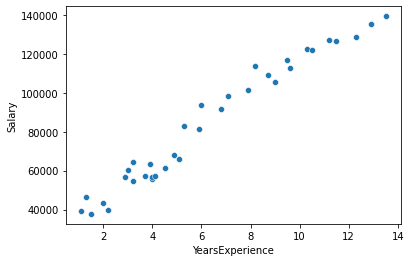

In [10]:
sns.scatterplot(x=salary['YearsExperience'],y=salary['Salary'],data=salary)
plt.show()

In [19]:
corr = salary.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


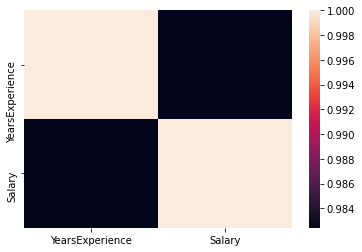

In [20]:
sns.heatmap(corr)
plt.show()

In [21]:
X = salary[['YearsExperience']]
Y = salary[['Salary']]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
yhat = lr.predict(X_test)
yhat

array([[120057.87672477],
       [ 88127.64484315],
       [ 73456.99776241],
       [118331.91824468],
       [ 97620.41648363],
       [ 71731.03928232],
       [ 63101.24688189]])

In [27]:
lr.score(X_test,Y_test)

0.9708090245443415

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


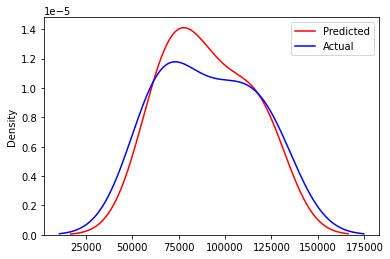

In [28]:
ax1 = sns.distplot(yhat,color='r',hist=False)
sns.distplot(Y_test,color='b',hist=False,ax=ax1)
plt.legend(['Predicted','Actual'])
plt.show()